## BUSINESS PROBLEM-1
### BACKGROUND: The Lending Club is a peer-to-peer lending site where members make loans to each other. The site makes anonymized data on loans and borrowers publicly available.

In [1]:
# Loading the packages

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


from scipy import stats



In [89]:
# Importing Data files

loan = pd.read_csv("E:/Analytix Lab/CASE STUDY/Python/7. Basic Statistics - Hypothesis Testing/LoansData.csv")

loan

Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
0             20000.00                    20000.00         8.90%   36 months   
1             19200.00                    19200.00        12.12%   36 months   
2             35000.00                    35000.00        21.98%   60 months   
3             10000.00                     9975.00         9.99%   36 months   
4             12000.00                    12000.00        11.71%   36 months   
...                ...                         ...           ...         ...   
2495          30000.00                    29950.00        16.77%   60 months   
2496          16000.00                    16000.00        14.09%   60 months   
2497          10000.00                    10000.00        13.99%   36 months   
2498           6000.00                     6000.00        12.42%   36 months   
2499           9000.00                     5242.75        13.79%   36 months   

            Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0     debt_consolidation               14.90%    SC       MORTGAGE   
1     debt_consolidation               28.36%    TX       MORTGAGE   
2     debt_consolidation               23.81%    CA       MORTGAGE   
3     debt_consolidation               14.30%    KS       MORTGAGE   
4            credit_card               18.78%    NJ           RENT   
...                  ...                  ...   ...            ...   
2495  debt_consolidation               19.23%    NY       MORTGAGE   
2496    home_improvement               21.54%    MD            OWN   
2497  debt_consolidation                4.89%    PA       MORTGAGE   
2498      major_purchase               16.66%    NJ           RENT   
2499  debt_consolidation                6.76%    NY           RENT   

      Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0            6541.67    735-739              14.00                  14272.00   
1            4583.33    715-719              12.00                  11140.00   
2           11500.00    690-694              14.00                  21977.00   
3            3833.33    695-699              10.00                   9346.00   
4            3195.00    695-699              11.00                  14469.00   
...              ...        ...                ...                       ...   
2495         9250.00    705-709              15.00                  45880.00   
2496         8903.25    740-744              18.00                  18898.00   
2497         2166.67    680-684               4.00                   4544.00   
2498         3500.00    675-679               8.00                   7753.00   
2499         3875.00    670-674               7.00                   7589.00   

      Inquiries.in.the.Last.6.Months Employment.Length  
0                               2.00          < 1 year  
1                               1.00           2 years  
2                               1.00           2 years  
3                               0.00           5 years  
4                               0.00           9 years  
...                              ...               ...  
2495                            1.00           8 years  
2496                            1.00         10+ years  
2497                            0.00         10+ years  
2498                            0.00           5 years  
2499                            0.00         10+ years  

[2500 rows x 14 columns]

### EDA

We find the data  aren't cleanly prepared for import -for instance numeric columns might have some strings in them


We see here that:

the interest rate information has "%" symbols in it.
loan length has " months" in it

there are a couple of values that are so large they must be typos
some values are missing "NA" values i.e. not available.
the FICO Range is really a numeric entity but is represented as a categorical variable in the data.

In [90]:
loan['Interest.Rate'][0:5] # first five rows of Interest.Rate

0     8.90%
1    12.12%
2    21.98%
3     9.99%
4    11.71%
Name: Interest.Rate, dtype: object

In [91]:
loan['Loan.Length'][0:5] # first five rows of Loan.Length

0    36 months
1    36 months
2    60 months
3    36 months
4    36 months
Name: Loan.Length, dtype: object

In [92]:
loan['FICO.Range'][0:5] # first five rows of FICO.Range

0    735-739
1    715-719
2    690-694
3    695-699
4    695-699
Name: FICO.Range, dtype: object

FICO Range is represented as a categorical variable in the data.

We need to change the categorical variable for FICO Range into something numeric so that we can use it in our calculations. As it stands, the values are merely labels, and while they convey meaning to humans, our software can't interpret them as the numbers they really represent.

So as a first step, we convert them from categorical variables to strings. So the abstract entity 735-739 becomes a string "735-739". Then we parse the strings so that a range such as "735-739" gets split into two numbers (735,739).

In [ ]:
To summarize - cleaning our data involves:

removing % signs from rates
removing the word ” months" from loan length.
managing outliers - remove such rows in this case
managing NA - remove or replacing vias mean of such rows in this case


In [93]:
#Clean the "Interest.Rate" and "Debt.To.Income.Ratio" column:
#Remove the percentage sign and convert the column to a numeric data type:


loan['Interest.Rate'] = loan['Interest.Rate'].str.replace('%', '').astype(float)

loan['Debt.To.Income.Ratio'] = loan['Debt.To.Income.Ratio'].str.replace('%', '').astype(float)


In [94]:
loan.head(2)

Amount.Requested  Amount.Funded.By.Investors  Interest.Rate Loan.Length  \
0          20000.00                    20000.00           8.90   36 months   
1          19200.00                    19200.00          12.12   36 months   

         Loan.Purpose  Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation                 14.90    SC       MORTGAGE   
1  debt_consolidation                 28.36    TX       MORTGAGE   

   Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67    735-739              14.00                  14272.00   
1         4583.33    715-719              12.00                  11140.00   

   Inquiries.in.the.Last.6.Months Employment.Length  
0                            2.00          < 1 year  
1                            1.00           2 years

In [95]:
loan['Employment.Length'] = loan['Employment.Length'].str.extract('(\d+)').astype(float)
loan['Employment.Length'].fillna(0, inplace=True)
loan['Loan.Length'] = loan['Loan.Length'].str.extract('(\d+)').astype(float)
loan['Loan.Length'].fillna(0, inplace=True)

loan.head()

Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  Loan.Length  \
0          20000.00                    20000.00           8.90        36.00   
1          19200.00                    19200.00          12.12        36.00   
2          35000.00                    35000.00          21.98        60.00   
3          10000.00                     9975.00           9.99        36.00   
4          12000.00                    12000.00          11.71        36.00   

         Loan.Purpose  Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation                 14.90    SC       MORTGAGE   
1  debt_consolidation                 28.36    TX       MORTGAGE   
2  debt_consolidation                 23.81    CA       MORTGAGE   
3  debt_consolidation                 14.30    KS       MORTGAGE   
4         credit_card                 18.78    NJ           RENT   

   Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67    735-739              14.00                  14272.00   
1         4583.33    715-719              12.00                  11140.00   
2        11500.00    690-694              14.00                  21977.00   
3         3833.33    695-699              10.00                   9346.00   
4         3195.00    695-699              11.00                  14469.00   

   Inquiries.in.the.Last.6.Months  Employment.Length  
0                            2.00               1.00  
1                            1.00               2.00  
2                            1.00               2.00  
3                            0.00               5.00  
4                            0.00               9.00

In [96]:
nan_counts = loan.isnull().sum()

print(nan_counts)

Amount.Requested                  1
Amount.Funded.By.Investors        1
Interest.Rate                     2
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              1
State                             0
Home.Ownership                    1
Monthly.Income                    1
FICO.Range                        2
Open.CREDIT.Lines                 3
Revolving.CREDIT.Balance          3
Inquiries.in.the.Last.6.Months    3
Employment.Length                 0
dtype: int64


In [97]:
# Replace NaN values with column means
loan = loan.fillna(loan.mean(numeric_only=True))


In [98]:
nan_counts = loan.isnull().sum()

print(nan_counts)

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    1
Monthly.Income                    0
FICO.Range                        2
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64


In [99]:
loan.head()

Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  Loan.Length  \
0          20000.00                    20000.00           8.90        36.00   
1          19200.00                    19200.00          12.12        36.00   
2          35000.00                    35000.00          21.98        60.00   
3          10000.00                     9975.00           9.99        36.00   
4          12000.00                    12000.00          11.71        36.00   

         Loan.Purpose  Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation                 14.90    SC       MORTGAGE   
1  debt_consolidation                 28.36    TX       MORTGAGE   
2  debt_consolidation                 23.81    CA       MORTGAGE   
3  debt_consolidation                 14.30    KS       MORTGAGE   
4         credit_card                 18.78    NJ           RENT   

   Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67    735-739              14.00                  14272.00   
1         4583.33    715-719              12.00                  11140.00   
2        11500.00    690-694              14.00                  21977.00   
3         3833.33    695-699              10.00                   9346.00   
4         3195.00    695-699              11.00                  14469.00   

   Inquiries.in.the.Last.6.Months  Employment.Length  
0                            2.00               1.00  
1                            1.00               2.00  
2                            1.00               2.00  
3                            0.00               5.00  
4                            0.00               9.00

In [100]:
# Clean the "FICO.Range" column:
# Extract the minimum and maximum FICO scores and convert them to numeric columns:


loan[['FICO.Min', 'FICO.Max']] = loan['FICO.Range'].str.split('-', expand=True).astype(float)
loan = loan.drop('FICO.Range', axis=1)


loan.head()

Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  Loan.Length  \
0          20000.00                    20000.00           8.90        36.00   
1          19200.00                    19200.00          12.12        36.00   
2          35000.00                    35000.00          21.98        60.00   
3          10000.00                     9975.00           9.99        36.00   
4          12000.00                    12000.00          11.71        36.00   

         Loan.Purpose  Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation                 14.90    SC       MORTGAGE   
1  debt_consolidation                 28.36    TX       MORTGAGE   
2  debt_consolidation                 23.81    CA       MORTGAGE   
3  debt_consolidation                 14.30    KS       MORTGAGE   
4         credit_card                 18.78    NJ           RENT   

   Monthly.Income  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67              14.00                  14272.00   
1         4583.33              12.00                  11140.00   
2        11500.00              14.00                  21977.00   
3         3833.33              10.00                   9346.00   
4         3195.00              11.00                  14469.00   

   Inquiries.in.the.Last.6.Months  Employment.Length  FICO.Min  FICO.Max  
0                            2.00               1.00    735.00    739.00  
1                            1.00               2.00    715.00    719.00  
2                            1.00               2.00    690.00    694.00  
3                            0.00               5.00    695.00    699.00  
4                            0.00               9.00    695.00    699.00

In [101]:
nan_counts = loan.isnull().sum()

print(nan_counts)

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    1
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
FICO.Min                          2
FICO.Max                          2
dtype: int64


In [102]:
# Replace NaN values with column means
loan = loan.fillna(loan.mean(numeric_only=True))

In [103]:
nan_counts = loan.isnull().sum()

print(nan_counts)

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    1
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
FICO.Min                          0
FICO.Max                          0
dtype: int64


In [104]:
# Now our Data is Without Null.. Just need to check and Outlier data


# Compute z-scores for each numeric column
numeric_columns = loan.select_dtypes(include=np.number).columns
z_scores = np.abs((loan[numeric_columns] - loan[numeric_columns].mean()) / loan[numeric_columns].std())

# Define threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Print the rows containing outliers
print(loan[outliers])

      Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  \
37            20125.00                    20125.00           7.62   
39             2400.00                     1850.00          12.49   
75             6725.00                      825.00          13.12   
81             3225.00                     3225.00           7.62   
94            10000.00                     9975.00          14.96   
...                ...                         ...            ...   
2398          12800.00                    12787.71           8.94   
2408          10000.00                    10000.00          22.47   
2414          24000.00                    23950.00          24.89   
2460          20000.00                    20000.00          14.09   
2477          17500.00                    17500.00           8.90   

      Loan.Length        Loan.Purpose  Debt.To.Income.Ratio State  \
37          36.00    home_improvement                  4.29    VA   
39          36.00    home_improve

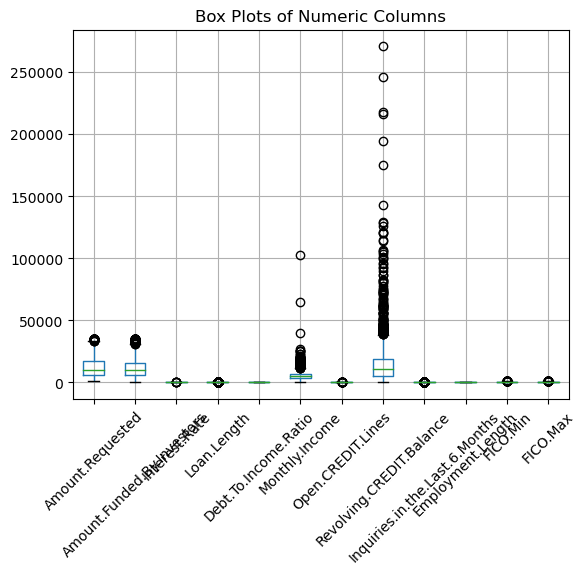

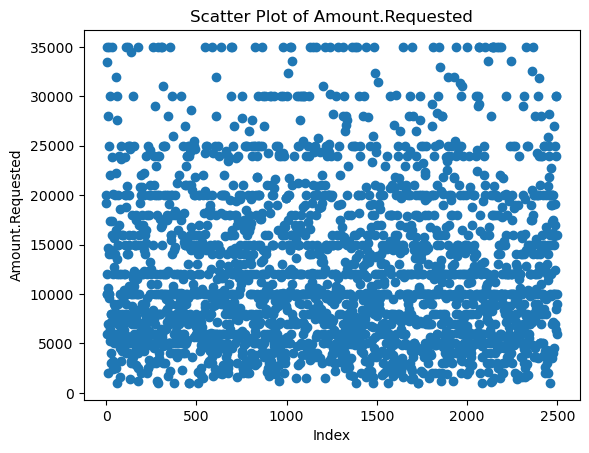

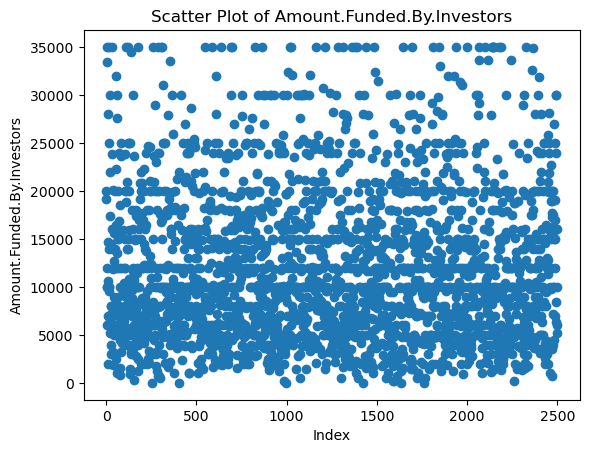

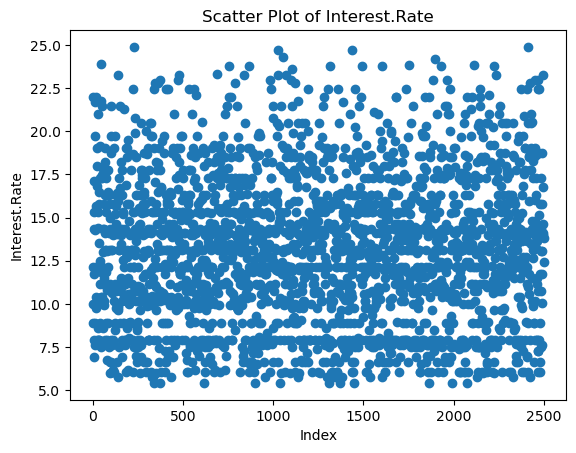

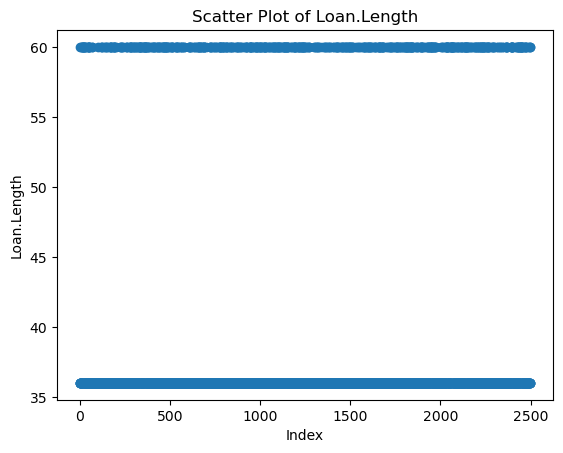

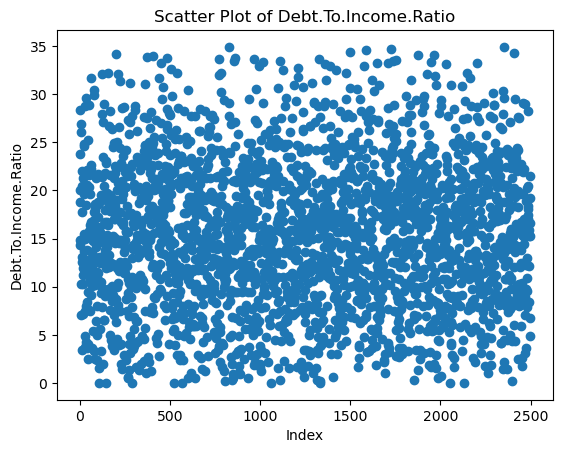

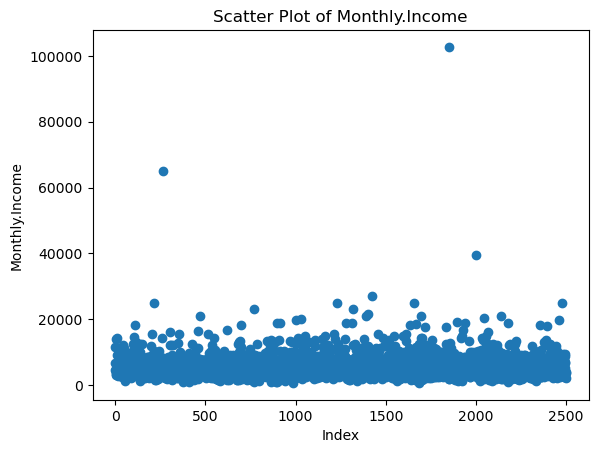

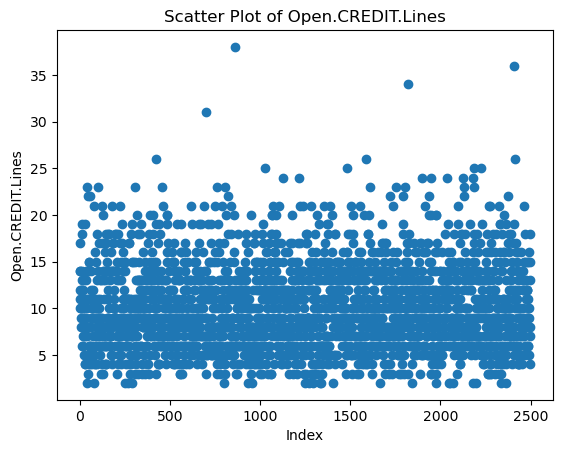

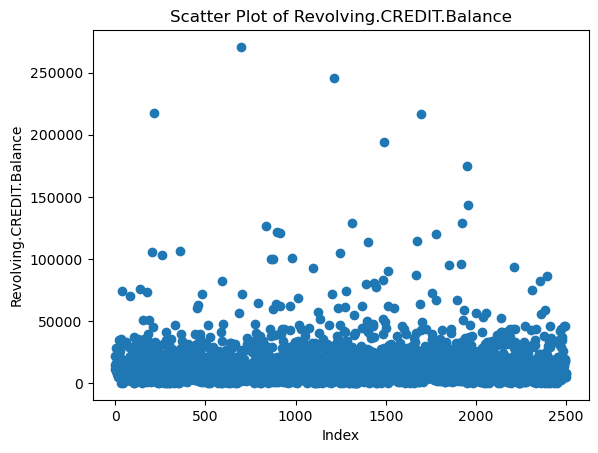

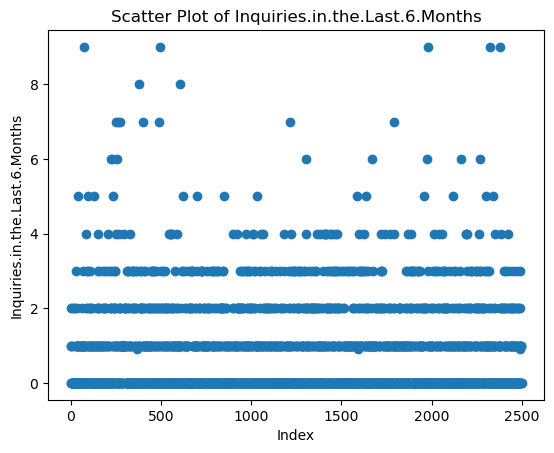

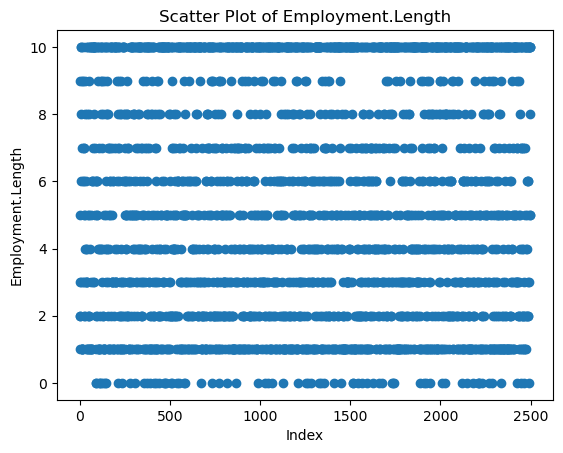

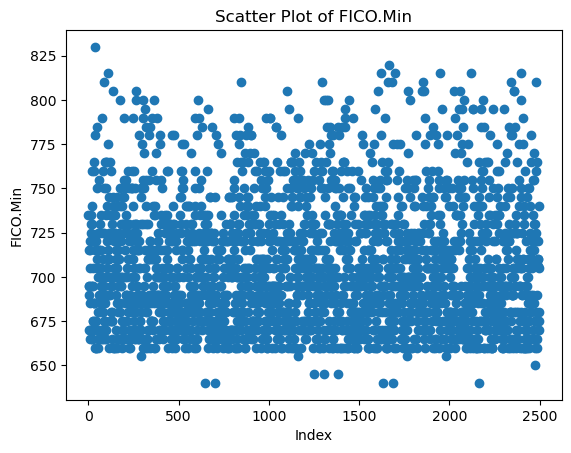

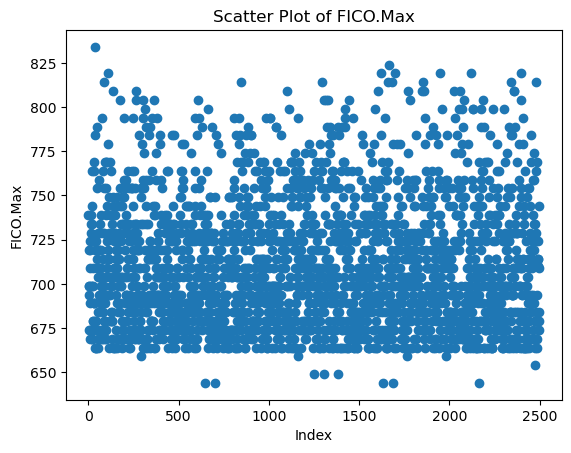

In [105]:
# Create box plots for numeric columns
numeric_columns = loan.select_dtypes(include=['float64', 'int64']).columns
loan[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Box Plots of Numeric Columns')
plt.show()

# Create scatter plots for numeric columns
for column in numeric_columns:
    plt.scatter(range(len(loan)), loan[column])
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title('Scatter Plot of ' + column)
    plt.show()

In [107]:

# Compute z-scores for each numeric column
numeric_columns = loan.select_dtypes(include=np.number).columns
z_scores = np.abs((loan[numeric_columns] - loan[numeric_columns].mean()) / loan[numeric_columns].std())

# Define threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Identify outlier rows
outlier_rows = (z_scores > threshold).any(axis=1)

# Remove outlier rows
LoanData_final = loan[~outlier_rows]

# Save the dataset without outliers
LoanData_final.to_csv('LoanData_final.csv', index=False)


In [108]:
LoanData_final.head()

Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  Loan.Length  \
0          20000.00                    20000.00           8.90        36.00   
1          19200.00                    19200.00          12.12        36.00   
2          35000.00                    35000.00          21.98        60.00   
3          10000.00                     9975.00           9.99        36.00   
4          12000.00                    12000.00          11.71        36.00   

         Loan.Purpose  Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation                 14.90    SC       MORTGAGE   
1  debt_consolidation                 28.36    TX       MORTGAGE   
2  debt_consolidation                 23.81    CA       MORTGAGE   
3  debt_consolidation                 14.30    KS       MORTGAGE   
4         credit_card                 18.78    NJ           RENT   

   Monthly.Income  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67              14.00                  14272.00   
1         4583.33              12.00                  11140.00   
2        11500.00              14.00                  21977.00   
3         3833.33              10.00                   9346.00   
4         3195.00              11.00                  14469.00   

   Inquiries.in.the.Last.6.Months  Employment.Length  FICO.Min  FICO.Max  
0                            2.00               1.00    735.00    739.00  
1                            1.00               2.00    715.00    719.00  
2                            1.00               2.00    690.00    694.00  
3                            0.00               5.00    695.00    699.00  
4                            0.00               9.00    695.00    699.00

In [138]:
###########################################

### BUSINESS PROBLEM:
### Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)

### Q.1a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

### Solution:-


#### 1. Define Null Hypothesis H0:

  Interest.Rate is Directly proportional to the Amount.Requested



#### 2. Define Alternate Hypothesis Ha:

Less Interset rate for High Loan Amount i.e. Interest.Rate is Inversely proportional to  Amount.Requested



#### 3. Define the CI and PValues
CI = 95% and Pvalues = 0.05



#### 4. Performing the Test

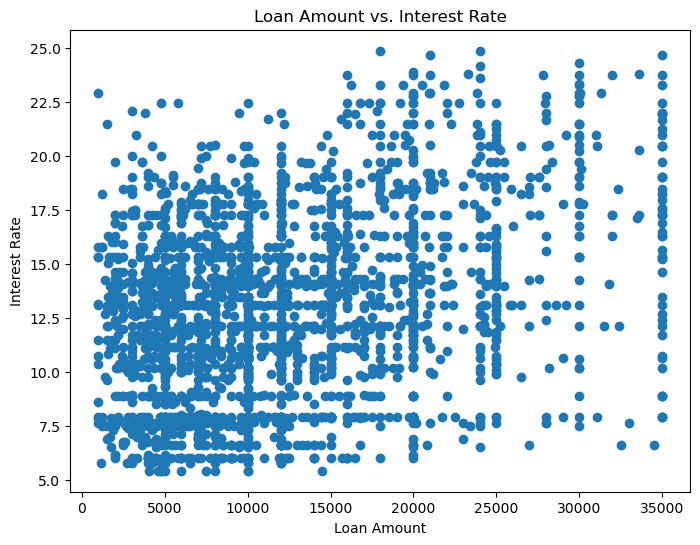

In [136]:
# Checking the required Column on Visual 

plt.figure(figsize=(8, 6))
plt.scatter(loan['Amount.Requested'], loan['Interest.Rate'])
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.title('Loan Amount vs. Interest Rate')
plt.show()



In [116]:
# Calculate the correlation coefficient between loan amount and interest rate:

correlation = loan['Amount.Requested'].corr(loan['Interest.Rate'])
print("Correlation Coefficient: {:.2f}".format(correlation))


Correlation Coefficient: 0.33


In [137]:
p_value = stats.pearsonr(loan['Amount.Requested'], loan['Interest.Rate'])[1]
alpha = 0.05  # significance level

if p_value < alpha:
    print("The relationship between loan amount and interest rate is statistically significant i.e both are Directly Proportaional to each other.")
else:
    print("There is no significant relationship between loan amount and interest rate, i.e both are Inversely Proportional to each other")


The relationship between loan amount and interest rate is statistically significant i.e both are Directly Proportaional to each other.


#### 5. Rejection Rule:
    We fail to reject the null hypothesis as new P-Value is Higher than the 0.05.

#### 6. Business Conclusions: 

The above test proves with 95% confidence that, the Interest_rate is directly related to amount_Requested. It Means, Interest rate will be High for High Amount Asked and Vice_versa. The Visual Data above also prooving the same.

In [ ]:
###############################################################

### Q1.b. Loan length is directly effecting intrest rate.

### Solution:-


#### 1. Define Null Hypothesis H0:

  Loan.Length is not directly related to Interest.Rate



#### 2. Define Alternate Hypothesis Ha:

Loan.Length is directly proportional to Interest.Rate



#### 3. Define the CI and PValues
CI = 95% and Pvalues = 0.05


#### 4. Performing the Test

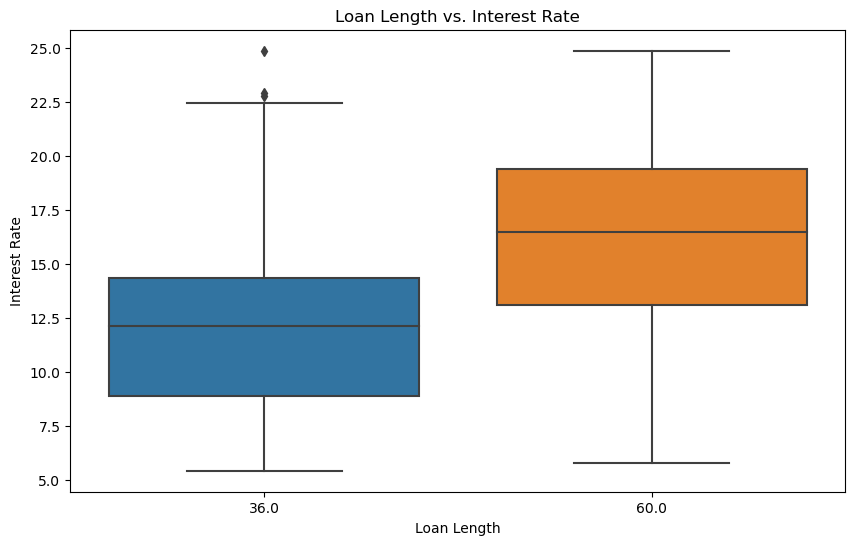

In [119]:
#Perform a box plot or violin plot to visualize the relationship between loan length and interest rate:

plt.figure(figsize=(10, 6))
sns.boxplot(x=loan['Loan.Length'], y=loan['Interest.Rate'])
plt.xlabel('Loan Length')
plt.ylabel('Interest Rate')
plt.title('Loan Length vs. Interest Rate')
plt.show()

In [156]:
# Calculate the correlation coefficient between loan length and interest rate:

correlation = loan['Loan.Length'].corr(loan['Interest.Rate'])
print("Correlation Coefficient: {:.2f}".format(correlation))



#conduct a hypothesis test to determine the significance of the relationship:
p_value = stats.spearmanr(loan['Loan.Length'], loan['Interest.Rate'])[1]
alpha = 0.05  # significance level

if p_value < alpha:
    print("The relationship between loan length and interest rate is statistically significant.")
else:
    print("There is no significant relationship between loan length and interest rate.")

print('p_value : ',p_value)

Correlation Coefficient: 0.42
The relationship between loan length and interest rate is statistically significant.
p_value :  2.9162072972133776e-91


#### 5. Rejection Rule:
    This result, rejecting the null hypothesis as new P-Value is less than the 0.05.

#### 6. Business Conclusions: 

The above test proves with 95% confidence that, The relationship between loan length and interest rate is statistically significant

In [ ]:
###################################################

### Q1.c. Interest rate varies for different purpose of loans

### Solution:-


#### 1. Define Null Hypothesis H0:

 Interest.Rate is not varies for different Purpose of Loans



#### 2. Define Alternate Hypothesis Ha:

 Interest.Rate varies for different Purpose of Loans



#### 3. Define the CI and PValues
CI = 95% and Pvalues = 0.05``

#### 4. Performing the Test

<Figure size 1200x600 with 0 Axes>

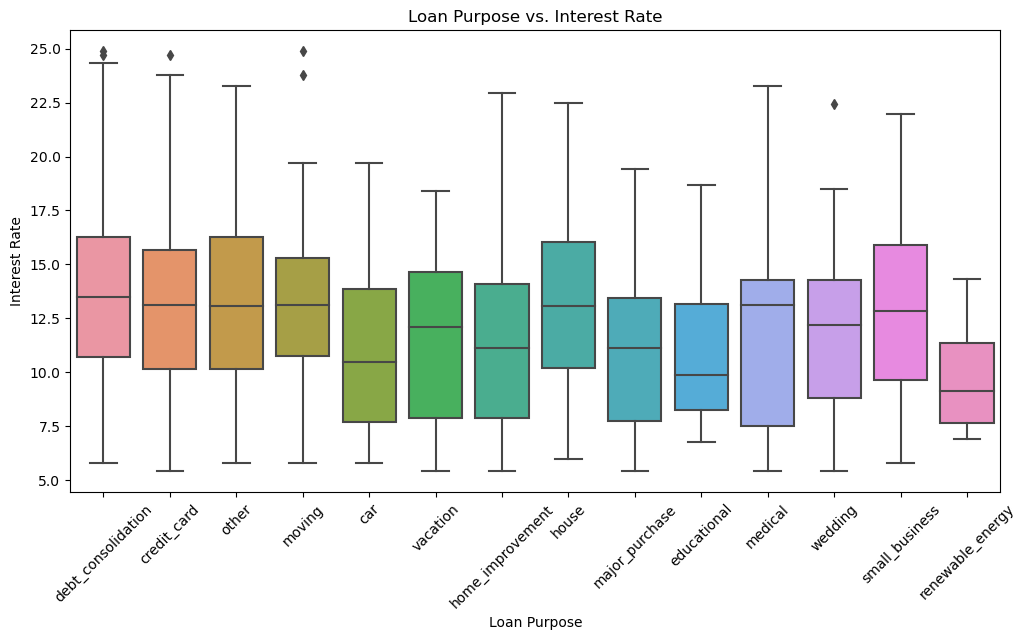

In [124]:
# Perform a box plot to visualize the relationship between loan purpose and interest rate:

plt.figure(figsize=(12, 6))
sns.boxplot(x=loan['Loan.Purpose'], y=loan['Interest.Rate'])
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate')
plt.title('Loan Purpose vs. Interest Rate')
plt.xticks(rotation=45)
plt.show()



In [129]:
#Perform a one-way ANOVA test to determine the significance of the relationship:

groups = loan.groupby('Loan.Purpose')['Interest.Rate'].apply(list)
f_value, p_value = stats.f_oneway(*groups)

alpha = 0.05  # significance level

if p_value < alpha:
    print("The interest rates vary significantly for different purposes of loans.")
else:
    print("There is no significant difference in interest rates among different purposes of loans.")
    
print("F-Score: ", f_value,'New P Value:', p_value)


The interest rates vary significantly for different purposes of loans.
F-Score:  7.482638784097435 New P Value: 1.1599665535989115e-14


#### 5. Rejection Rule:
    This test rejecting the null hypothesis as new P-Value is less than the 0.05.
    
    
#### 6. Business Conclusions: 

The above test proves with 95% confidence that, The interest rates vary significantly for different purposes of loans.
    

In [ ]:
##########################################################################################

### Q1.d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

### Solution:-


#### 1. Define Null Hypothesis H0:

  There is no direct relation with People Owning Home has High Fico Score.



#### 2. Define Alternate Hypothesis Ha:

There is direct relation with People Owning Home has High Fico Score.


#### 3. Define the CI and PValues
CI = 95% and Pvalues = 0.05

#### 4. Performing the Test

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

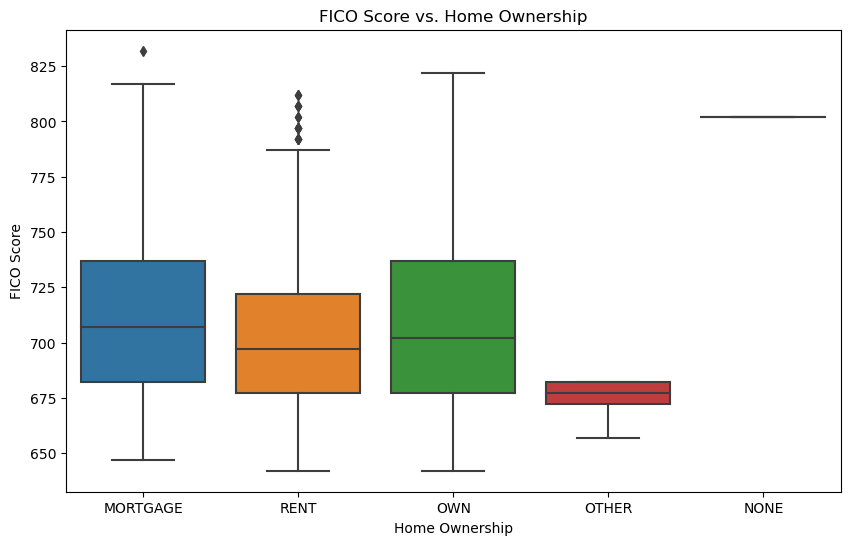

In [133]:
#Calculate the average FICO score:

loan['FICO.Score'] = (loan['FICO.Min'] + loan['FICO.Max']) / 2



# Perform a box plot to visualize the relationship between home ownership and FICO scores:

plt.figure(figsize=(10, 6))
sns.boxplot(x=loan['Home.Ownership'], y=loan['FICO.Score'])
plt.xlabel('Home Ownership')
plt.ylabel('FICO Score')
plt.title('FICO Score vs. Home Ownership')
plt.show()


In [134]:
# Perform a hypothesis test to determine the significance of the relationship:

own_home = loan[loan['Home.Ownership'] == 'OWN']['FICO.Score']
not_own_home = loan[loan['Home.Ownership'] != 'OWN']['FICO.Score']

t_stat, p_value = stats.ttest_ind(own_home, not_own_home, equal_var=False)

alpha = 0.05  # significance level

if p_value < alpha:
    print("There is a significant difference in FICO scores between home owners and non-home owners.")
else:
    print("There is no significant difference in FICO scores between home owners and non-home owners.")


print('t_stat : ', t_stat, 'p_value : ', p_value  )

There is no significant difference in FICO scores between home owners and non-home owners.
t_stat :  0.24122676850732303 p_value :  0.8095982090868796


#### 5. Rejection Rule:
    We fail to reject the null hypothesis as new P-Value is higher than the 0.05.
    
    
#### 6. Business Conclusions: 

The above test proves with 95% confidence that, There is no significant difference in FICO scores between home owners and non-home owners

In [ ]:
######################################################################################

## BUSINESS PROBLEM - 2

In [139]:
# Data gethering

price_quotes = pd.read_csv("E:/Analytix Lab/CASE STUDY/Python/7. Basic Statistics - Hypothesis Testing/Price_Quotes.csv")

price_quotes.head()


Order_Number  Barry_Price  Mary_Price
0             1          126         114
1             2          110         118
2             3          138         114
3             4          142         111
4             5          146         129

#### BUSINESS PROBLEM: We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

### Solution:-


#### 1. Define Null Hypothesis H0:

  There is no significant difference in the average price quotes provided by Mary and Barry.



#### 2. Define Alternate Hypothesis Ha:

There is a significant difference in the average price quotes provided by Mary and Barry


#### 3. Define the CI and PValues
CI = 95% and Pvalues = 0.05

In [146]:
#Calculate the average price quotes for Mary and Barry:
mary_quotes = price_quotes['Mary_Price']
barry_quotes = price_quotes['Barry_Price']

mary_mean = np.mean(mary_quotes)
barry_mean = np.mean(barry_quotes)

print("Average price quote by Mary: {:.2f}".format(mary_mean))
print("Average price quote by Barry: {:.2f}".format(barry_mean))


Average price quote by Mary: 114.75
Average price quote by Barry: 124.33


#### 4. Performing the Test:

In [144]:
# Perform a hypothesis test to determine if there is a significant difference:
t_stat, p_value = stats.ttest_ind(mary_quotes, barry_quotes)

alpha = 0.05  # significance level

if p_value < alpha:
    print("There is a significant difference in the average price quotes provided by Mary and Barry.")
else:
    print("There is no significant difference in the average price quotes provided by Mary and Barry.")


    
print('t_stat :', t_stat,' p_value: ', p_value)

There is no significant difference in the average price quotes provided by Mary and Barry.
t_stat : -1.4147436739281787  p_value:  0.17114226132118285


#### 5. Rejection Rule:
    We fail to reject the null hypothesis as new P-Value is higher than the 0.05.
    
    
#### 6. Business Conclusions: 

The above test proves with 95% confidence that, There is no significant difference in the average price quotes provided by Mary and Barry

In [ ]:
###########################################################################################################

### BUSINESS PROBLEM-3

In [154]:
#data gethering :

Treatment_Facility = pd.read_csv("E:/Analytix Lab/CASE STUDY/Python/7. Basic Statistics - Hypothesis Testing/Treatment_Facility.csv")
Treatment_Facility.head()

Month Reengineer  Employee_Turnover  VAR4   VAR5
0      1      Prior               0.00 24.39  42.68
1      2      Prior               6.06 19.35  25.81
2      3      Prior              12.12 35.09 146.20
3      4      Prior               3.33 18.40 110.43
4      5      Prior              12.90 17.96  23.95

### Q. BUSINESS PROBLEM: 
### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?



### Solution:-


#### 1. Define Null Hypothesis H0:

  -  The reengineering effort did not have any effect on the incidence of behavioral problems and staff turnover.



#### 2. Define Alternate Hypothesis Ha:

-  The reengineering effort had an effect, leading to a change in the incidence of behavioral problems and staff turnover.


#### 3. Define the CI and PValues

CI = 95% and Pvalues = 0.05



#### 4. Performing the Test:

In [155]:

# Separate the critical incident rates for the pre-reengineering period
pre_reengineering = Treatment_Facility[Treatment_Facility['Reengineer'] == 'Prior']['Employee_Turnover']

# Perform the t-test
t_stat, p_value = stats.ttest_1samp(pre_reengineering, popmean=0)

alpha = 0.05  # significance level

# Interpret the results
if p_value < alpha:
    print("There is evidence that the critical incidence rate improved after the reengineering effort.")
else:
    print("There is no significant evidence that the critical incidence rate improved after the reengineering effort.")
    
print('t_stat :', t_stat,' p_value: ', p_value)

There is evidence that the critical incidence rate improved after the reengineering effort.
t_stat : 6.009050879697813  p_value:  6.131032223321062e-05


#### 5. Rejection Rule:
    this test reject the null hypothesis as new P-Value is lower than the 0.05.
    
    
#### 6. Business Conclusions: 

The above test proves with 95% confidence that, There is evidence that the critical incidence rate improved after the reengineering effort

In [ ]:
#########################################################################################################################

## BUSINESS PROBLEM-4

In [157]:
# data gethering

Priority_Assessment = pd.read_csv("E:/Analytix Lab/CASE STUDY/Python/7. Basic Statistics - Hypothesis Testing/Priority_Assessment.csv")

Priority_Assessment

Days Priority
0    3.30     High
1    7.90   Medium
2    0.30     High
3    0.70   Medium
4    8.60   Medium
..    ...      ...
637  2.50      Low
638  0.30     High
639  0.30   Medium
640  1.30   Medium
641  0.50     High

[642 rows x 2 columns]

### BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.


### Solution:-


#### 1. Define Null Hypothesis H0:

  -  There is no significant difference in the average completion times between different priority levels. Specifically, the average completion time of high priority jobs is the same as that of medium priority jobs, and the average completion time of medium priority jobs is the same as that of low priority jobs.
  
  u_high = u_medium

#### 2. Define Alternate Hypothesis Ha:

-  TThere is a significant difference in the average completion times between different priority levels. Specifically, the average completion time of high priority jobs is different from that of medium priority jobs, and the average completion time of medium priority jobs is different from that of low priority jobs.

  u_high != u_medium


#### 3. Define the CI and PValues

CI = 95% and Pvalues = 0.05



#### 4. Performing the Test:

In [166]:
# Separate the completion times for high and medium priority jobs
high_priority = Priority_Assessment[Priority_Assessment['Priority'] == 'High']['Days']
medium_priority = Priority_Assessment[Priority_Assessment['Priority'] == 'Medium']['Days']


# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(high_priority, medium_priority)

alpha = 0.05  # significance level

# Interpret the results
if p_value < alpha:
    print("There is evidence of a significant difference between the mean completion times of high and medium priority jobs.")
else:
    print("There is no significant difference between the mean completion times of high and medium priority jobs.")

    
    
    
print("    ")

print("t_statistic  :  " , t_statistic)
print('p_value_high_medium  :', p_value_high_medium)
print('p_value_medium_low: ', p_value_medium_low)



There is no significant difference between the mean completion times of high and medium priority jobs.
    
t_statistic  :   0.925239411198133
p_value_high_medium  : 0.3552308818116795
p_value_medium_low:  0.01843700901540487


#### 5. Rejection Rule:
This test  fail to reject the null hypothesis as new P-Value is Higher than the 0.05 as (p_value_high_medium  : 0.3552308818116795 , p_value_medium_low:  0.01843700901540487).
    
    
#### 6. Business Conclusions: 

The above test proves with 95% confidence that, "There is no significant difference between the mean completion times of high and medium priority jobs."

In [ ]:
###########################################################################################################################

## BUSINESS PROBLEM-5

In [3]:
# Data gathering

Films = pd.read_csv("E:/Analytix Lab/CASE STUDY/Python/7. Basic Statistics - Hypothesis Testing/Films.csv")

Films.head()

_rowstate_                    Movie  Gender Marital_Status  Sinage  \
0           0  Ferris Buellers Day Off  Female        Married    2.00   
1           0  Ferris Buellers Day Off  Female         Single    1.00   
2           0  Ferris Buellers Day Off    Male        Married    2.00   
3           0  Ferris Buellers Day Off  Female        Married    1.00   
4           0  Ferris Buellers Day Off  Female        Married    1.00   

   Parking  Clean  Overall  Age  Income Hear_About  
0     2.00   2.00     2.00 3.00    1.00          5  
1     1.00   1.00     1.00 2.00    1.00          5  
2     4.00   3.00     2.00 4.00    1.00          5  
3     3.00   2.00     2.00 4.00    1.00          5  
4     1.00   1.00     1.00 3.00    3.00          1

### Q. What is the overall level of customer satisfaction?

In [4]:

# Calculate the average rating for each satisfaction question
signage_rating = Films['Sinage'].mean()
parking_rating = Films['Parking'].mean()
cleanliness_rating = Films['Clean'].mean()
overall_rating = Films['Overall'].mean()

# Calculate the overall average rating
overall_average_rating = Films[['Sinage', 'Parking', 'Clean', 'Overall']].mean().mean()

# Print the results
print(f"Signage satisfaction rating: {signage_rating:.2f}")
print(f"Parking satisfaction rating: {parking_rating:.2f}")
print(f"Cleanliness satisfaction rating: {cleanliness_rating:.2f}")
print(f"Overall customer service satisfaction rating: {overall_rating:.2f}")
print(" ")
print(f"Overall average rating: {overall_average_rating:.2f}")

Signage satisfaction rating: 1.88
Parking satisfaction rating: 1.76
Cleanliness satisfaction rating: 1.68
Overall customer service satisfaction rating: 1.62
 
Overall average rating: 1.74


#### overall satisfaction is in between   coded: 1 = Excellent; 2 = Good

### Q. What factors are linked to satisfaction?

In [5]:
# select the relevant columns for correlation analysis

factors_column = ['Sinage', 'Parking', 'Clean', 'Overall', 'Age', 'Income']

# Calculating the correlation matrix
Correlation_matrix = Films[factors_column].corr()


# Print the correlation matrix
print(Correlation_matrix)


         Sinage  Parking  Clean  Overall   Age  Income
Sinage     1.00     0.47   0.35     0.38 -0.09   -0.04
Parking    0.47     1.00   0.44     0.52 -0.02   -0.02
Clean      0.35     0.44   1.00     0.35 -0.01    0.02
Overall    0.38     0.52   0.35     1.00 -0.03   -0.00
Age       -0.09    -0.02  -0.01    -0.03  1.00    0.14
Income    -0.04    -0.02   0.02    -0.00  0.14    1.00


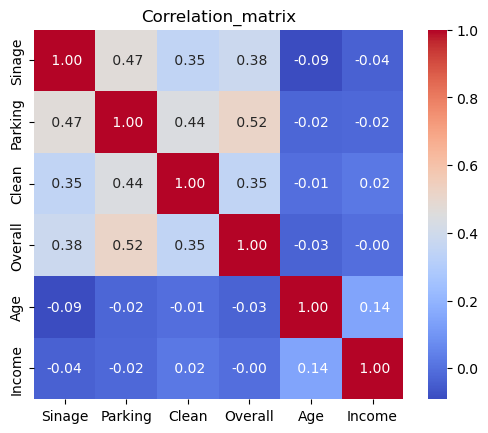

In [6]:
# showing the above relation with Headmap

sns.heatmap(Correlation_matrix, annot=True,cmap="coolwarm",fmt= " .2f", square =True)

# Title
plt.title('Correlation_matrix')

plt.show()

### Q. What is the demographic profile of Film on the Rocks patrons?

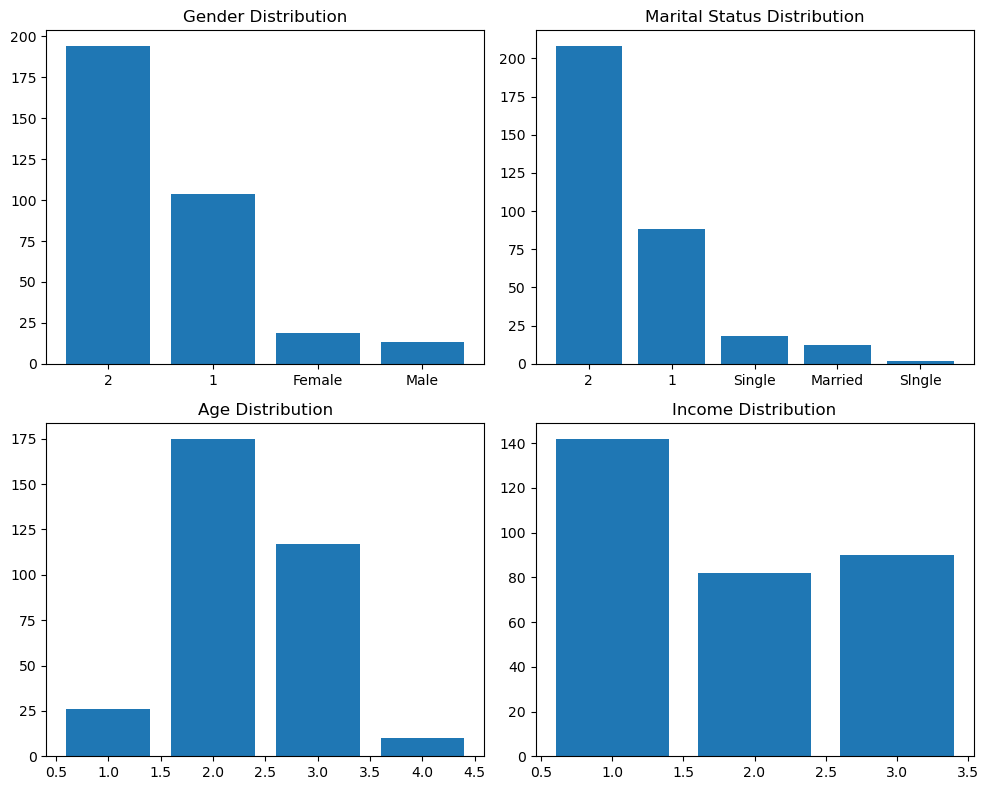

In [7]:

# Calculate the counts of each demographic variable
gender_counts = Films['Gender'].value_counts()
marital_status_counts = Films['Marital_Status'].value_counts()
age_counts = Films['Age'].value_counts()
income_counts = Films['Income'].value_counts()

# Plot the demographic profile
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot gender distribution
axes[0, 0].bar(gender_counts.index, gender_counts.values)
axes[0, 0].set_title('Gender Distribution')

# Plot marital status distribution
axes[0, 1].bar(marital_status_counts.index, marital_status_counts.values)
axes[0, 1].set_title('Marital Status Distribution')

# Plot age distribution
axes[1, 0].bar(age_counts.index, age_counts.values)
axes[1, 0].set_title('Age Distribution')

# Plot income distribution
axes[1, 1].bar(income_counts.index, income_counts.values)
axes[1, 1].set_title('Income Distribution')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()


### Q. In what media outlet(s) should the film series be advertised?

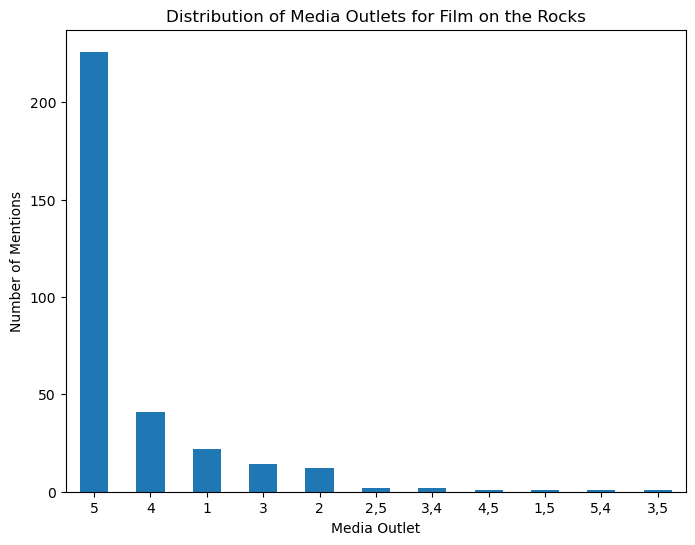

In [8]:
# Count the occurrences of each media outlet
media_counts = Films['Hear_About'].value_counts()

# Plot the distribution of media outlets
plt.figure(figsize=(8, 6))
media_counts.plot(kind='bar')
plt.xlabel('Media Outlet')
plt.ylabel('Number of Mentions')
plt.title('Distribution of Media Outlets for Film on the Rocks')
plt.xticks(rotation=0)
plt.show()

### The patron’s response to this question: “How did you hear about Film on the Rocks?” Respondents could check any of the following that applied: 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth